To check what libraries are installed:

In [0]:
!pip freeze

The common libraries for developing a Deep Learning solution are:
Numpy, Matplotlib and Keras. Keras is an abstraction layer of Tensorflow, allowing to develop Deep Learning solutions more easily. In fact, Keras is very useful to design a prototype and then translate it into a low-level framework like Tensorflow.

https://numpy.org/

https://matplotlib.org/

https://keras.io/

#### Important
Keras can be found inside Tensorflow and also as an isolated library. So, depending on the installation you can import it like:

```
import tf.keras
import keras
```



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import keras

from PIL import Image

ModuleNotFoundError: No module named 'keras'

In [2]:
# Set the random seed to get reproducible results
from numpy.random import seed
seed(22)

from tensorflow.random import set_seed
set_seed(22)

ModuleNotFoundError: No module named 'tensorflow'

### Datasets

For the Feed-Forward neural network experiments, the selected dataset will be the MNIST. This dataset is the most famous dataset in the literature and resources related to Deep Learning. It is composed of a set of handwritten digits and the objective is to classify them correctly.

In [0]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print("Check the shape of the input data:")
X_train.shape, X_test.shape

Check the shape of the input data:


((60000, 28, 28), (10000, 28, 28))

In [7]:
print("Check the shape of the output data:")
y_train.shape, y_test.shape

Check the shape of the output data:


((60000,), (10000,))

Let´s take a look to the samples

In [8]:
first_sample = X_train[0]
print(first_sample)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
Image.fromarray(np.flipud(first_sample))

NameError: name 'Image' is not defined

In [10]:
second_sample = X_train[1]
Image.fromarray(second_sample)

In [12]:
# Summary of elements for each class in the training and the testing datasets
print("Number of elements for each Training instance")
np.unique(y_train, return_counts=True)

Number of elements for each Training instance


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [13]:
# Summary of elements for each class in the training and the testing datasets
print("Number of elements for each Testing instance")
np.unique(y_test, return_counts=True)

Number of elements for each Testing instance


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

### Standarize data

In this example, the dataset is automatically separated when the data is loaded. In a real application, we have to define the sets for training and testing finding the perfect balance between them.

In [7]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(X_train)
print(standardized_data.shape)

NameError: name 'StandardScaler' is not defined

### Prepare data
When developing a Deep Learning solution, the data has to be prepared properly. We must to normalize the data, apply specific transformations and so on. Depending on the type of data, this step has to be performed before seperating the datasets.

Another important point is to transform the outputs to categorical.

https://keras.io/utils/#to_categorical

In [0]:
# Normalization
X_train = (X_train / 255)
X_test = (X_test / 255)

In [0]:
X_train[0]

In [0]:
# Reshape data
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

In [19]:
X_train.shape

(60000, 784)

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Design neural network architecture

Let´s design the model architecture. In this experiment, the model will be a Forward network so the architecture will be Sequential. Also, the connections between the layers will be Denses.

In [0]:
from keras.models import Sequential
from keras.layers import Dense

```
# Build the model.
model = Sequential([
  Dense(neurons, activation='?', input_shape=(?,)),  # The first layer has an extra parameter to define the input shape
  # Hidden layer,
  # ...
  # Hidden layer,
  Dense(output_neurons, activation='?'), # The output layer has the same number of neurons as labels.
                                         # Depending of the problem, the activation is "special"
])
```



In [0]:
input_shape = (784, )

In [0]:
# Build the model.
model = Sequential([
  Dense(120, activation='relu', input_shape=input_shape),
  Dense(120, activation='relu'),
  Dense(10, activation='softmax'),
])

In [106]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 120)               94200     
_________________________________________________________________
dense_23 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1210      
Total params: 109,930
Trainable params: 109,930
Non-trainable params: 0
_________________________________________________________________


### Define the optimizer and how the performance will be measured
Once the architecture is set, we need to indicate which optimizer will be used and how the performance is measured. For instance, if the problem is a classification problem it is common to use 'categorical_crossentropy'.

https://keras.io/optimizers/

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.00001)

In [0]:
model.compile(
  optimizer=sgd,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

### Training process
Remember to set the values to some hyperparameters like epochs and batch_size. The right value has a tremendous impact on execution time and performance.

In [0]:
batch_size = 32
epochs = 30

Let´s check some charts related to the training. Is there overfitting?

In [110]:
history = model.fit(
  X_train, y_train,
  epochs=epochs, batch_size=batch_size, validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 4s 73us/step - loss: 2.3417 - accuracy: 0.1250 - val_loss: 2.3393 - val_accuracy: 0.1297
Epoch 2/30
54000/54000 [==============================] - 4s 67us/step - loss: 2.3317 - accuracy: 0.1284 - val_loss: 2.3292 - val_accuracy: 0.1333
Epoch 3/30
54000/54000 [==============================] - 3s 64us/step - loss: 2.3220 - accuracy: 0.1320 - val_loss: 2.3193 - val_accuracy: 0.1370
Epoch 4/30
54000/54000 [==============================] - 3s 65us/step - loss: 2.3125 - accuracy: 0.1353 - val_loss: 2.3097 - val_accuracy: 0.1425
Epoch 5/30
54000/54000 [==============================] - 4s 65us/step - loss: 2.3033 - accuracy: 0.1397 - val_loss: 2.3003 - val_accuracy: 0.1468
Epoch 6/30
54000/54000 [==============================] - 4s 66us/step - loss: 2.2944 - accuracy: 0.1443 - val_loss: 2.2911 - val_accuracy: 0.1508
Epoch 7/30
54000/54000 [==============================] - 4s 72us/ste

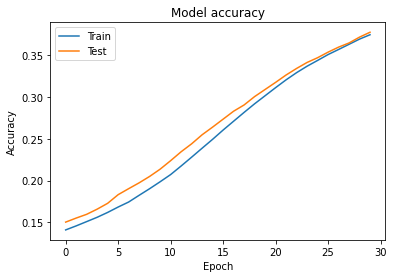

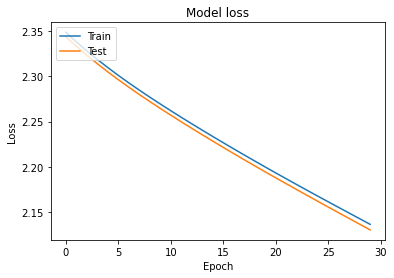

In [102]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Testing evaluation
Once the model is trained, we can evaluate the model using the testing dataset to check how it performs actually. Some metrics that we can use are precision and recall:

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png width="400" height="750">


In [0]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)

In [60]:
np.round(predictions[1500], decimals=3)

array([0.   , 0.874, 0.007, 0.03 , 0.003, 0.005, 0.001, 0.002, 0.072,
       0.007], dtype=float32)

In [104]:
predictions = np.argmax(predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print(classification_report(y_test_labels, predictions))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       980
           1       0.51      0.77      0.61      1135
           2       0.30      0.38      0.34      1032
           3       0.09      0.03      0.04      1010
           4       0.25      0.36      0.30       982
           5       0.41      0.11      0.17       892
           6       0.33      0.84      0.48       958
           7       0.54      0.15      0.23      1028
           8       0.00      0.00      0.00       974
           9       0.34      0.50      0.40      1009

    accuracy                           0.38     10000
   macro avg       0.35      0.38      0.32     10000
weighted avg       0.35      0.38      0.33     10000



Also, we can save the version of the model (the weights) to use it later.

In [0]:
model.save_weights('model.h5')


In [0]:
# Build the model.
model = Sequential([
  Dense(24, activation='relu', input_shape=input_shape),
  Dense(24, activation='relu'),
  Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('model.h5')

In [41]:
# Predict on the first 5 test images.
predictions = model.predict(X_test[:5])

print(np.argmax(predictions, axis=1))
print(y_test[:5])

[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
